Ideas on how to merge data
First merge the data I have. do feature engineering later

**Features**

*Census* - monthly aggregated - should be easy to include an offset in a poisson regression
*Mag* - daily, will have a lot of nans, 
*SpaceWeather* - daily
*Winds* - daily
*Chlorophyll* - daily
*Tides* - daily

**Targets**

*Stranding* 
    - total
    - split by species

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from seaborn import heatmap
from matplotlib import rcParams
from cmocean import cm

In [2]:
%matplotlib inline

In [27]:
rcParams['axes.titlesize'] = 18
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

In [4]:
dfCensDayLageno = pd.read_pickle('../PklJar/dfCensusCapeCodLagenorhyncus_day.pkl')
dfCensDayDdelph = pd.read_pickle('../PklJar/dfDdelphis_census_capecod_1999_2014.pkl')

In [ ]:
dfCensDayDdelph = dfCensDayDdelph.loc[dfCensDayDdelph.index.year<2015]

In [6]:
dfCensDayLageno.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [10]:
dfCensDayLageno.rename(columns={'count': 'Lageno_count'}, inplace=True)
dfCensDayDdelph.rename(columns={'count': 'Ddelph_count'}, inplace=True)

In [112]:
dfCensDayLagenoWkRolling = dfCensDayLageno.rolling(7).sum()
dfCensDayDdelphWkRolling = dfCensDayDdelph.rolling(7).sum()

In [116]:
dfCensDayLagenoWkRolling.describe()

,Lageno_count
count,5749.000000
mean,28.798748
std,135.891204
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2776.000000


In [7]:
dfStrand = pd.read_pickle('../PklJar/dfStrandDailyCleanCompact.pkl')

In [8]:
dfStrand.head()

,NUM_ANIMALS,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus,CONDITION_CODE_1,CONDITION_CODE_2,CONDITION_CODE_3,CONDITION_CODE_4,CONDITION_CODE_6
REPORT_DATE,,,,,,,,,,,,
1999-03-07,11.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0
1999-03-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-03-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-03-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-03-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


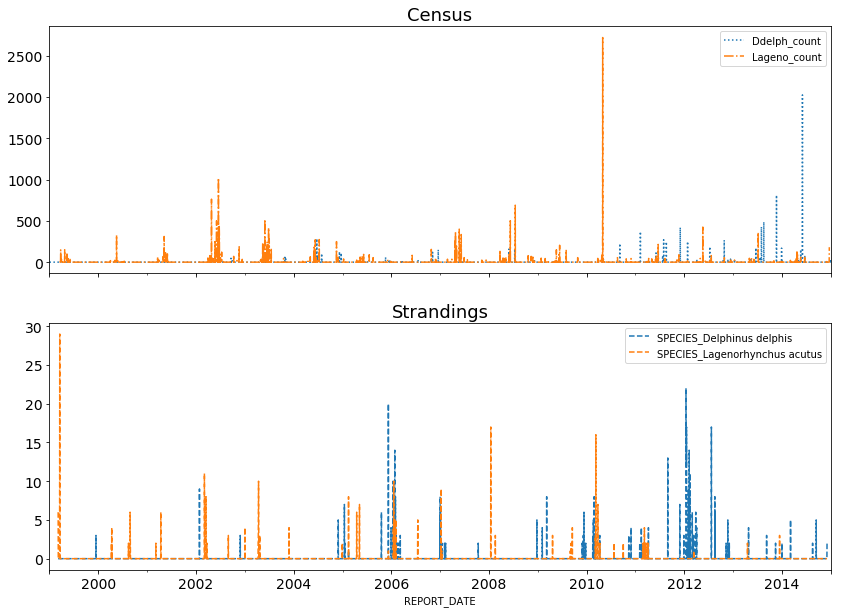

In [29]:
f, ax = pl.subplots(nrows=2, figsize=(14, 10), sharex=True)
dfStrand.plot(y=['SPECIES_Delphinus delphis', 'SPECIES_Lagenorhynchus acutus'], ax=ax[1], ls='--',)
dfCensDayDdelph.plot(y='Ddelph_count', ax=ax[0], ls=':')
dfCensDayLageno.plot(y='Lageno_count', ax=ax[0], ls='-.');
ax[0].set_title('Census')
ax[1].set_title('Strandings');

In [139]:
dfMerged = dfStrand.merge(dfCensDayDdelphWkRolling, right_index=True, left_index=True, how='outer')
dfMerged = dfMerged.merge(dfCensDayLagenoWkRolling, right_index=True, left_index=True, how='outer')
dfMerged.replace(np.NaN, 0, inplace=True)
dfMerged.head()

,NUM_ANIMALS,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus,CONDITION_CODE_1,CONDITION_CODE_2,CONDITION_CODE_3,CONDITION_CODE_4,CONDITION_CODE_6,Ddelph_count,Lageno_count
1999-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
dfMerged.describe()

,NUM_ANIMALS,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus,CONDITION_CODE_1,CONDITION_CODE_2,CONDITION_CODE_3,CONDITION_CODE_4,CONDITION_CODE_6,Ddelph_count,Lageno_count
count,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000
mean,0.637748,0.090349,0.013176,0.001882,0.052019,0.000342,0.000342,0.094285,0.033539,0.027379,0.002738,0.000171,12.226557,28.330595
std,10.904013,0.889813,0.751743,0.111759,0.682059,0.026162,0.026162,1.078396,0.459078,0.398873,0.101298,0.013081,87.152036,134.831166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,484.000000,22.000000,56.000000,8.000000,29.000000,2.000000,2.000000,56.000000,19.000000,14.000000,6.000000,1.000000,2025.000000,2776.000000


In [141]:
dfMerged.tail()

,NUM_ANIMALS,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus,CONDITION_CODE_1,CONDITION_CODE_2,CONDITION_CODE_3,CONDITION_CODE_4,CONDITION_CODE_6,Ddelph_count,Lageno_count
2014-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0
2014-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0
2014-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0
2014-12-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0
2014-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0


Splitting up features from labels and pickling both dataFrames:

In [160]:
dfFeatures = dfMerged[['Ddelph_count', 'Lageno_count']]
dfLabels = dfMerged.drop(['Ddelph_count', 'Lageno_count'], axis=1)

In [150]:
dfFeatures.to_pickle('../PklJar/DFFEATURES.pkl')
dfLabels.to_pickle('../PklJar/DFLABELS.pkl')

In [161]:
# Pulling in Mag:
dfMag = pd.read_pickle('../PklJar/dfMagDaily.pkl')

In [162]:
dfMag.head()

,FRDH,FRDV,OTTH,OTTV
DATE_TIME,,,,
1999-01-01,20999.987708,49201.519653,17459.028474,53549.040000
1999-01-02,20995.609097,49202.668125,17455.841440,53548.428889
1999-01-03,21050.438681,52278.752361,17458.259553,53551.839861
1999-01-04,21101.213611,49311.501111,17453.573850,53549.170278
1999-01-05,20985.217292,49205.891597,17447.151464,53554.155208


In [163]:
dfFeatures = dfFeatures.merge(dfMag, how='outer', left_index=True, right_index=True)

In [165]:
dfFeatures.head()

,Ddelph_count,Lageno_count,FRDH,FRDV,OTTH,OTTV
1999-01-01,0.0,0.0,20999.987708,49201.519653,17459.028474,53549.040000
1999-01-02,0.0,0.0,20995.609097,49202.668125,17455.841440,53548.428889
1999-01-03,0.0,0.0,21050.438681,52278.752361,17458.259553,53551.839861
1999-01-04,0.0,0.0,21101.213611,49311.501111,17453.573850,53549.170278
1999-01-05,0.0,0.0,20985.217292,49205.891597,17447.151464,53554.155208


In [166]:
dfFeatures.to_pickle('../PklJar/DFFEATURES.pkl')

In [167]:
# Pulling in SpaceWeather
dfSW = pd.read_pickle('../PklJar/dfSpaceWeatherDaily.pkl')

In [170]:
dfSW.loc[dfSW.index.year>1998].head()

,Kp_index,Sunspot_No,Dst_index,AE_index,Proton_flux_gt30MeV,Proton_flux_gt60MeV
datetime,,,,,,
1999-01-01,15.750,89.0,-3.333333,94.333333,0.562273,0.449091
1999-01-02,17.750,94.0,-7.458333,139.875000,0.569167,0.453750
1999-01-03,10.500,80.0,-4.125000,59.958333,0.570000,0.452917
1999-01-04,17.625,90.0,-18.250000,211.625000,0.541818,0.432273
1999-01-05,19.000,89.0,-23.000000,187.583333,0.583913,0.466087


In [172]:
dfFeatures = dfFeatures.merge(dfSW.loc[dfSW.index.year>1998], how='outer', left_index=True, right_index=True)

In [173]:
dfFeatures.head()

,Ddelph_count,Lageno_count,FRDH,FRDV,OTTH,OTTV,Kp_index,Sunspot_No,Dst_index,AE_index,Proton_flux_gt30MeV,Proton_flux_gt60MeV
1999-01-01,0.0,0.0,20999.987708,49201.519653,17459.028474,53549.040000,15.750,89.0,-3.333333,94.333333,0.562273,0.449091
1999-01-02,0.0,0.0,20995.609097,49202.668125,17455.841440,53548.428889,17.750,94.0,-7.458333,139.875000,0.569167,0.453750
1999-01-03,0.0,0.0,21050.438681,52278.752361,17458.259553,53551.839861,10.500,80.0,-4.125000,59.958333,0.570000,0.452917
1999-01-04,0.0,0.0,21101.213611,49311.501111,17453.573850,53549.170278,17.625,90.0,-18.250000,211.625000,0.541818,0.432273
1999-01-05,0.0,0.0,20985.217292,49205.891597,17447.151464,53554.155208,19.000,89.0,-23.000000,187.583333,0.583913,0.466087


In [179]:
dfFeatures = dfFeatures.loc[dfFeatures.index.year<2015]

In [182]:
dfFeatures. index.min(), dfFeatures.index.max()

(Timestamp('1999-01-01 00:00:00', freq='D'),
 Timestamp('2014-12-31 00:00:00', freq='D'))

In [183]:
dfLabels.index.min(), dfLabels.index.max()

(Timestamp('1999-01-01 00:00:00', freq='D'),
 Timestamp('2014-12-31 00:00:00', freq='D'))

In [184]:
dfFeatures.to_pickle('../PklJar/DFFEATURES.pkl')

### Pulling in tides

In [185]:
dfTides = pd.read_pickle('../PklJar/dfTidesDaily.pkl')

In [186]:
dfTides.index.min(), dfTides.index.max()

(Timestamp('1999-01-01 00:00:00', freq='D'),
 Timestamp('2014-12-31 00:00:00', freq='D'))

In [187]:
dfTides.head()

,Pred_min,ampDiff_min,vel_min,move_min,Pred_max,ampDiff_max,vel_max,move_max,Pred_std,ampDiff_std,vel_std,move_std,Pred_med,ampDiff_med,vel_med,move_med
Date_Time,,,,,,,,,,,,,,,,
1999-01-01,-0.46,-3.90,-0.607792,3.47,3.44,3.58,0.569761,3.90,2.046890,4.287179,0.675697,0.223383,1.435,3.470,0.555200,3.580
1999-01-02,-0.47,-3.91,-0.610938,3.15,3.44,3.58,0.569761,3.91,2.050024,4.088088,0.654427,0.312943,1.435,0.165,0.012217,3.530
1999-01-03,-0.44,-3.85,-0.604712,3.14,3.41,3.54,0.563395,3.85,2.138933,4.077144,0.653703,0.355949,-0.130,-3.140,-0.529213,3.540
1999-01-04,-0.36,-3.69,-0.579581,3.09,3.33,3.44,0.547480,3.69,1.964943,3.945149,0.633691,0.246171,1.455,0.165,0.012479,3.430
1999-01-05,-0.25,-3.47,-0.549340,2.99,3.22,3.33,0.529973,3.47,1.869991,3.766717,0.606212,0.201887,1.475,0.125,0.007250,3.285


In [188]:
dfFeatures = dfFeatures.merge(dfTides, 'outer', left_index=True, right_index=True)

In [189]:
dfFeatures.head()

,Ddelph_count,Lageno_count,FRDH,FRDV,OTTH,OTTV,Kp_index,Sunspot_No,Dst_index,AE_index,...,vel_max,move_max,Pred_std,ampDiff_std,vel_std,move_std,Pred_med,ampDiff_med,vel_med,move_med
1999-01-01,0.0,0.0,20999.987708,49201.519653,17459.028474,53549.040000,15.750,89.0,-3.333333,94.333333,...,0.569761,3.90,2.046890,4.287179,0.675697,0.223383,1.435,3.470,0.555200,3.580
1999-01-02,0.0,0.0,20995.609097,49202.668125,17455.841440,53548.428889,17.750,94.0,-7.458333,139.875000,...,0.569761,3.91,2.050024,4.088088,0.654427,0.312943,1.435,0.165,0.012217,3.530
1999-01-03,0.0,0.0,21050.438681,52278.752361,17458.259553,53551.839861,10.500,80.0,-4.125000,59.958333,...,0.563395,3.85,2.138933,4.077144,0.653703,0.355949,-0.130,-3.140,-0.529213,3.540
1999-01-04,0.0,0.0,21101.213611,49311.501111,17453.573850,53549.170278,17.625,90.0,-18.250000,211.625000,...,0.547480,3.69,1.964943,3.945149,0.633691,0.246171,1.455,0.165,0.012479,3.430
1999-01-05,0.0,0.0,20985.217292,49205.891597,17447.151464,53554.155208,19.000,89.0,-23.000000,187.583333,...,0.529973,3.47,1.869991,3.766717,0.606212,0.201887,1.475,0.125,0.007250,3.285


In [190]:
dfFeatures.tail()

,Ddelph_count,Lageno_count,FRDH,FRDV,OTTH,OTTV,Kp_index,Sunspot_No,Dst_index,AE_index,...,vel_max,move_max,Pred_std,ampDiff_std,vel_std,move_std,Pred_med,ampDiff_med,vel_med,move_med
2014-12-27,27.0,0.0,21363.893382,46702.184743,NaN,NaN,14.500,91.0,-11.958333,113.458333,...,0.557368,3.53,1.958043,3.944672,0.633500,0.107858,1.500,0.025,-0.002492,3.415
2014-12-28,27.0,0.0,21372.522750,46699.318382,NaN,NaN,19.875,100.0,2.541667,146.541667,...,0.540157,3.43,1.876832,3.785916,0.607198,0.107199,1.480,-0.030,-0.006914,3.250
2014-12-29,27.0,0.0,21369.382299,46698.101632,NaN,NaN,33.750,94.0,-4.625000,288.291667,...,0.518325,3.30,1.788768,3.608650,0.578190,0.152834,1.435,0.005,-0.003108,3.100
2014-12-30,52.0,0.0,21360.897486,46701.280146,NaN,NaN,29.250,88.0,-10.500000,219.958333,...,0.496606,3.17,1.749209,3.573854,0.567358,0.164621,2.830,2.880,0.462032,3.160
2014-12-31,52.0,0.0,21372.353681,46697.858903,NaN,NaN,18.625,88.0,1.500000,125.583333,...,0.480628,3.15,1.708274,3.422251,0.545786,0.172627,1.415,0.025,-0.001508,2.950


In [192]:
dfFeatures.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5844 entries, 1999-01-01 to 2014-12-31
Freq: D
Data columns (total 28 columns):
Ddelph_count           5844 non-null float64
Lageno_count           5844 non-null float64
FRDH                   5836 non-null float64
FRDV                   5824 non-null float64
OTTH                   5479 non-null float64
OTTV                   5465 non-null float64
Kp_index               5844 non-null float64
Sunspot_No             5844 non-null float64
Dst_index              5844 non-null float64
AE_index               5844 non-null float64
Proton_flux_gt30MeV    5352 non-null float64
Proton_flux_gt60MeV    5352 non-null float64
Pred_min               5844 non-null float64
ampDiff_min            5844 non-null float64
vel_min                5844 non-null float64
move_min               5844 non-null float64
Pred_max               5844 non-null float64
ampDiff_max            5844 non-null float64
vel_max                5844 non-null float64
move_max    

In [202]:
dfFeatures.to_pickle('../PklJar/DFFEATURES.pkl')

In [194]:
dfWind = pd.read_pickle('../PklJar/dfDailyWind.pkl')

In [203]:
dfFeatures = dfFeatures.merge(dfWind, 'outer', left_index=True, right_index=True)

In [204]:
dfFeatures.head()

,Ddelph_count,Lageno_count,FRDH,FRDV,OTTH,OTTV,Kp_index,Sunspot_No,Dst_index,AE_index,...,Pred_med,ampDiff_med,vel_med,move_med,EasterlyWS,SoutherlyWS,WTMP,WVHT,APD,DPD
1999-01-01,0.0,0.0,20999.987708,49201.519653,17459.028474,53549.040000,15.750,89.0,-3.333333,94.333333,...,1.435,3.470,0.555200,3.580,-8.369086,-1.962736,5.629167,0.782083,4.260000,7.372083
1999-01-02,0.0,0.0,20995.609097,49202.668125,17455.841440,53548.428889,17.750,94.0,-7.458333,139.875000,...,1.435,0.165,0.012217,3.530,-10.358338,2.124278,5.470833,1.029167,3.723333,4.049167
1999-01-03,0.0,0.0,21050.438681,52278.752361,17458.259553,53551.839861,10.500,80.0,-4.125000,59.958333,...,-0.130,-3.140,-0.529213,3.540,5.530758,-3.071964,5.187500,1.402083,3.920000,4.574583
1999-01-04,0.0,0.0,21101.213611,49311.501111,17453.573850,53549.170278,17.625,90.0,-18.250000,211.625000,...,1.455,0.165,0.012479,3.430,-6.726604,-2.535160,5.108333,1.735000,6.136667,10.669583
1999-01-05,0.0,0.0,20985.217292,49205.891597,17447.151464,53554.155208,19.000,89.0,-23.000000,187.583333,...,1.475,0.125,0.007250,3.285,-8.472319,-0.380683,4.904348,0.875000,4.175455,8.880909


In [205]:
dfFeatures.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5844 entries, 1999-01-01 to 2014-12-31
Freq: D
Data columns (total 34 columns):
Ddelph_count           5844 non-null float64
Lageno_count           5844 non-null float64
FRDH                   5836 non-null float64
FRDV                   5824 non-null float64
OTTH                   5479 non-null float64
OTTV                   5465 non-null float64
Kp_index               5844 non-null float64
Sunspot_No             5844 non-null float64
Dst_index              5844 non-null float64
AE_index               5844 non-null float64
Proton_flux_gt30MeV    5352 non-null float64
Proton_flux_gt60MeV    5352 non-null float64
Pred_min               5844 non-null float64
ampDiff_min            5844 non-null float64
vel_min                5844 non-null float64
move_min               5844 non-null float64
Pred_max               5844 non-null float64
ampDiff_max            5844 non-null float64
vel_max                5844 non-null float64
move_max    

In [206]:
dfFeatures.to_pickle('../PklJar/DFFEATURES.pkl')

In [207]:
dfCorr = dfFeatures.corr()

In [208]:
from seaborn import heatmap

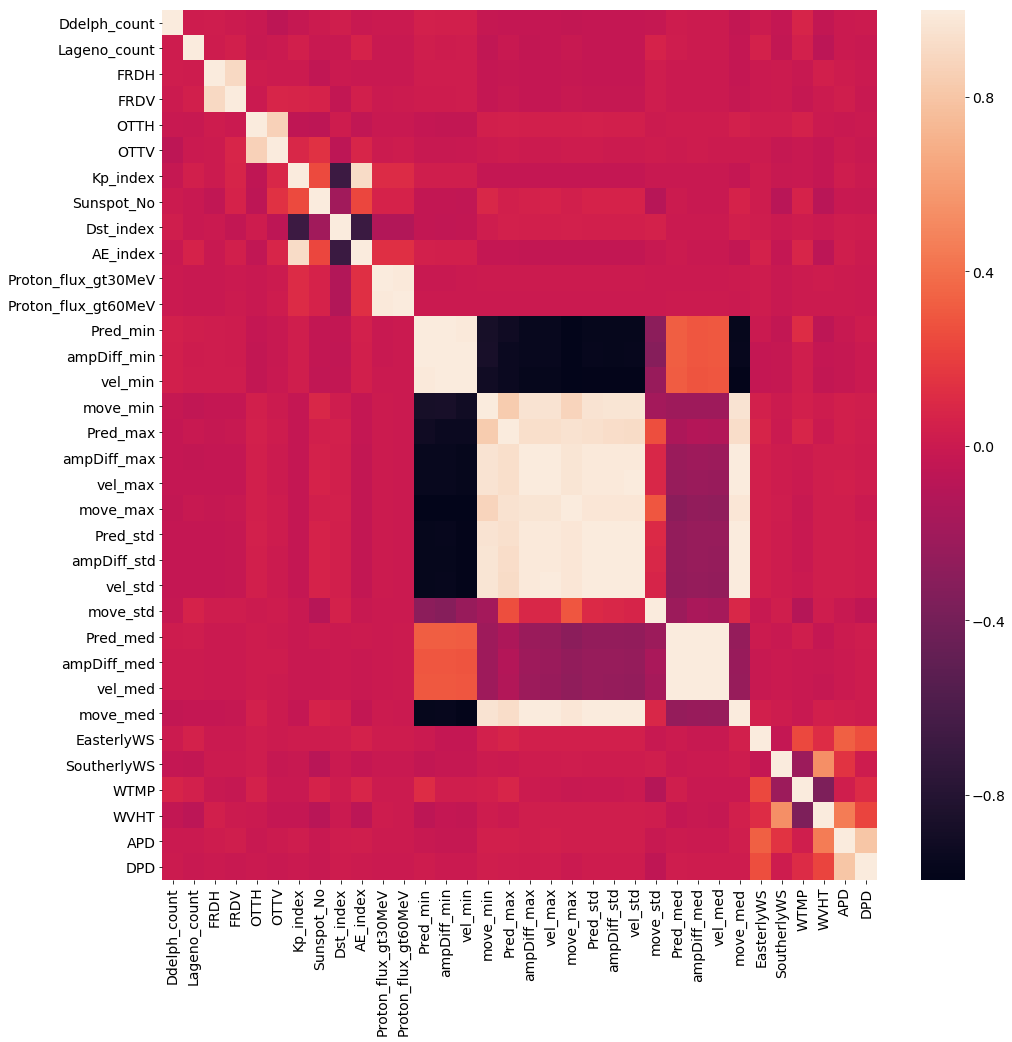

In [210]:
f, ax = pl.subplots(figsize=(16,16))
heatmap(dfCorr, ax=ax)